# Урок 4. Визуальный анализ данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keplergl import KeplerGl
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

## Задание 1.

### 1.1. Скачать данные в закрепе к уроку

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


| Название признака | Описание |
| --- | :--- |
| id | идентификационный номер дома |
| date | дата продажи |
| price | стоимость |
| bedrooms | кол-во спален |
| bathrooms | кол-во ванных комнат (0.25 - комната с туалетом, 0.5 - комната с туалетом и раковиной) |
| sqft_living | жилая площадь |
| sqft_lot | площадь прилегающего участка |
| floors | кол-во этажей |
| waterfront | вид на набережную |
| view | оценка внешнего вида |
| condition | оценка состояния |
| grade | оценка качества строительства и дизайна здания |
| sqft_above | площадь наземной части |
| sqft_basement | площадь подземной части |
| yr_built | год строительства дома |
| yr_renovated | год последнего ремонта или реконструкции |
| zipcode | почтовый индекс |
| lat | широта |
| long | долгота |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

В данных нет пропусков. Дата сохранена как текст. \
Преобразуем поле date в формат даты.

In [4]:
df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


В количестве спален есть аномалии/выбросы: максимум 33 при среднем = 3.37 и медаине = 3.

In [6]:
df.describe(include=['datetime'])

,date
count,21613
unique,372
top,2014-06-23 00:00:00
freq,142
first,2014-05-02 00:00:00
last,2015-05-27 00:00:00


In [7]:
df.duplicated().sum()

0

In [8]:
df.duplicated('id').sum()

177

Нет полных дублей (т.е. все строки уникальны), но есть повторяющиеся id. \
Избавимся от дублей в id. Для анализа возьмем последние данные (с максимальной датой продажи).

In [9]:
df['rank'] = df.groupby('id')['date'].rank(ascending=False)
df['rank'].value_counts()

1.0    21436
2.0      176
3.0        1
Name: rank, dtype: int64

In [10]:
df = df[df['rank'] == 1].reset_index()
df

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rank
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.0
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1.0
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1.0
21432,21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1.0
21433,21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1.0
21434,21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1.0


### 1.2 Изучите стоимости недвижимости
Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы.

Уменьшим размерность стоимости недвижимости - переведем цену в тысячи.

In [11]:
df['price'] = df['price']/1000

In [12]:
df['price'].describe()

count    21436.000000
mean       541.649963
std        367.314929
min         75.000000
25%        324.866000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

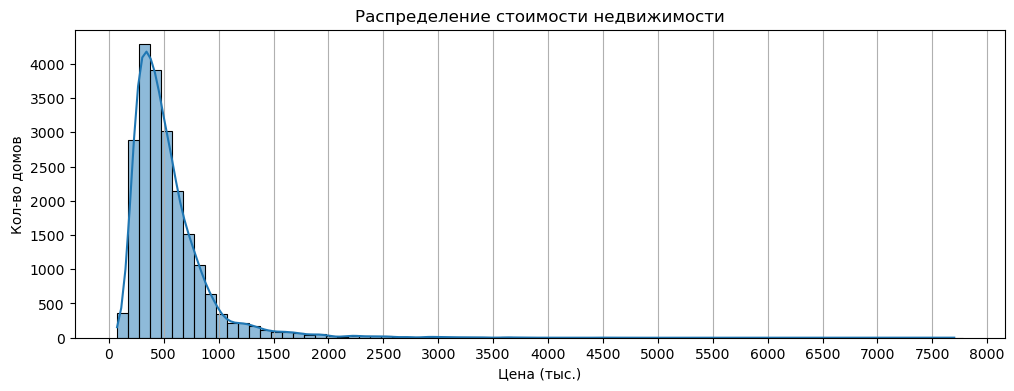

In [13]:
plt.figure(figsize=(12, 4))

sns.histplot(data=df, x='price', binwidth=100, kde=True)
ticks = np.arange(0,8100,500)
plt.xticks(ticks)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена (тыс.)')
plt.ylabel('Кол-во домов')
plt.grid(axis='x');

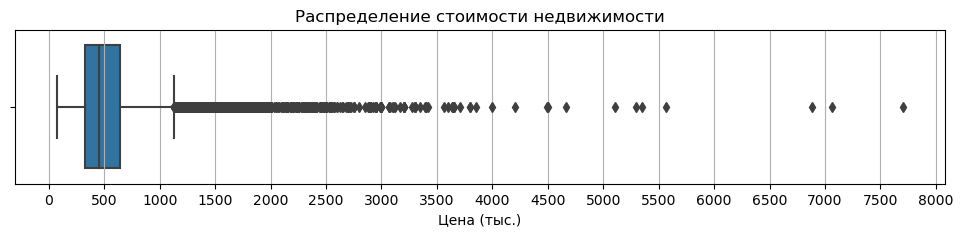

In [14]:
plt.figure(figsize=(12, 2))

sns.boxplot(data=df, x = 'price')
plt.xticks(ticks)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена (тыс.)')
plt.grid(axis='x');

*Стоимость недвижимости варьируется от 75 тыс. до 7.7 млн. долларов(?). При этом 95% домов были проданы в пределе 1.2 млн. долларов. \
Средняя стоимость дома 541 тыс. при медиане 450 тыс., что так же говорит о скошенности (ассиметрии) распределения.\
В основном продаются дома от 325 тыс. до 645 тыс. долларов.*

### 1.3 Изучите распределение квадратуры жилой площади

In [15]:
df['sqft_living'].describe()

count    21436.000000
mean      2082.704936
std        919.146469
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

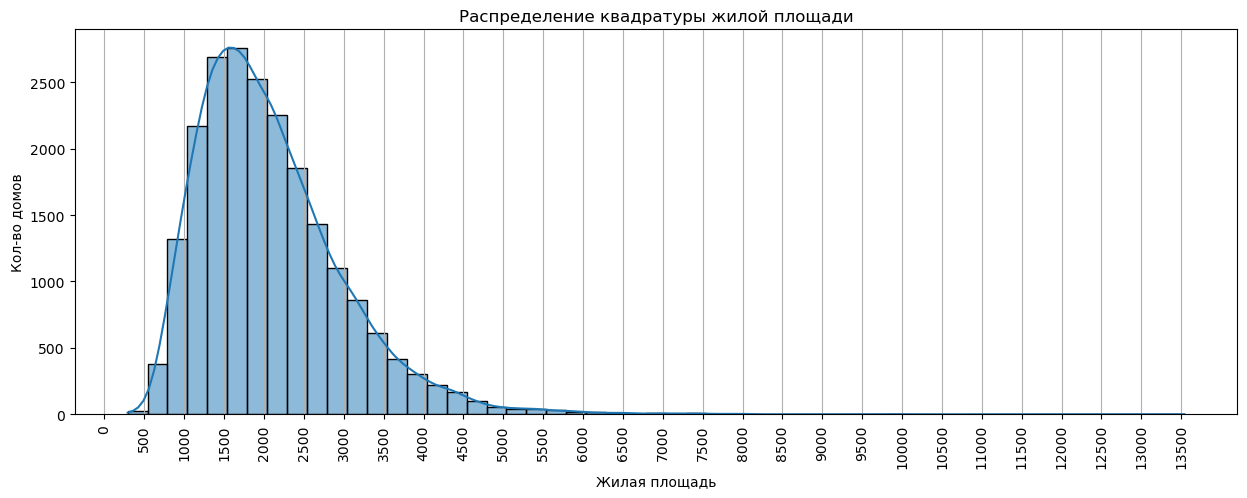

In [16]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df, x='sqft_living', binwidth=250, kde=True)
ticks = np.arange(0,df['sqft_living'].max()+1,500)
plt.xticks(ticks, rotation = 90)

plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во домов')
plt.grid(axis='x');

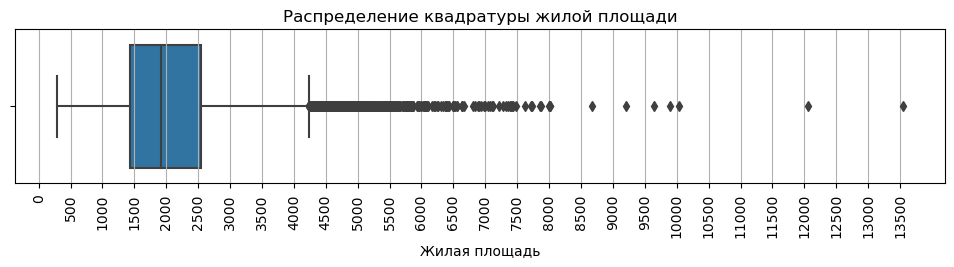

In [17]:
plt.figure(figsize=(12, 2))

sns.boxplot(data=df, x='sqft_living')
plt.xticks(ticks, rotation = 90)

plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.grid(axis='x');

In [18]:
np.quantile(df['sqft_living'], 0.97)

4140.0

*Квадратура жилой площади варьируется от 290 до 13540 кв.м.(?) При этом 97% лежит в пределе 4200 кв.м. \
Среднее значение жилой площади дома составляет 2082 кв.м. при медиане 1920, что так же говорит о скошенности (ассиметрии) распределения. \
В основном продаются дома с площадью от 1430 до 2550 кв.м.*

*В целом график распределения квадратуры жилой площади повторяет график распредления стоимости недвижимости.*

### 1.4 Изучите распределение года постройки

In [19]:
df['yr_built'].describe()

count    21436.000000
mean      1971.098433
std         29.385277
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [20]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    429
2003    422
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

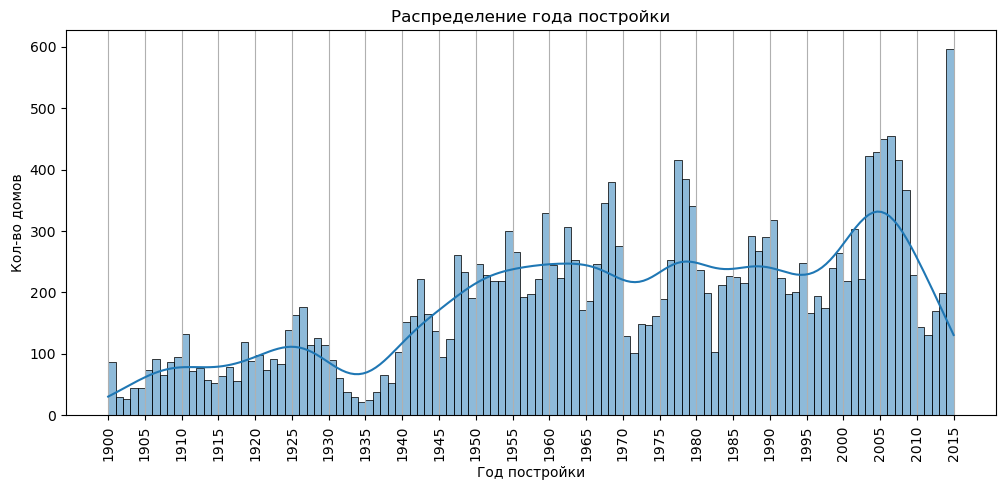

In [21]:
plt.figure(figsize=(12, 5))

sns.histplot(data=df, x='yr_built', binwidth=1, kde=True)

ticks = np.arange(df['yr_built'].min(),df['yr_built'].max()+1,5)
plt.xticks(ticks=ticks, rotation = 90)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.grid(axis='x');

*В наших данных самый старый дом 1900 года посторойки, а самый новый 2015 года. \
Большие "провалы" на гистограмме распределения года постройки совпадают с кризисами в США, что, скорее всего, говорит о снижении уровня застройки в эти годы. \
Чаще всего покупают дома 2003-2008 года постройки. Больше всего продано домов 2014 года посторойки.*

## Задание 2.

Постройте график. Сделайте выводы.

### 2.1 Изучите распределение домов от наличия вида на набережную

In [22]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data

no     21273
yes      163
Name: waterfront, dtype: int64

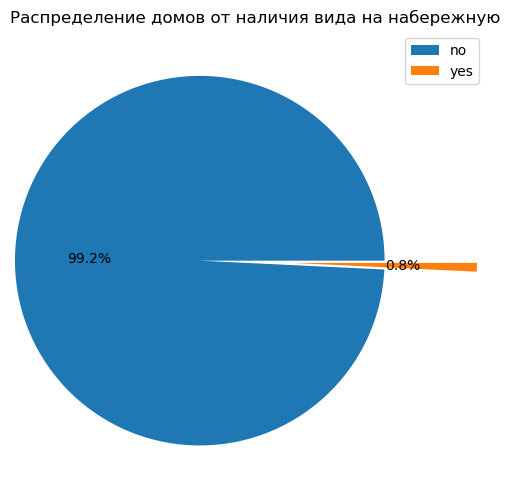

In [23]:
plt.figure(figsize=(6, 6))

expl = [0.3, 0.2]
plt.pie(data, autopct='%1.1f%%', explode=expl)

plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);

*Менее 1% проданых домов имеют вид на набережную.*

### 2.2 Изучите распределение этажей домов

In [24]:
df['floors'].describe()

count    21436.000000
mean         1.496198
std          0.540388
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [25]:
data = df['floors'].value_counts()
data

1.0    10559
2.0     8209
1.5     1888
3.0      611
2.5      161
3.5        8
Name: floors, dtype: int64

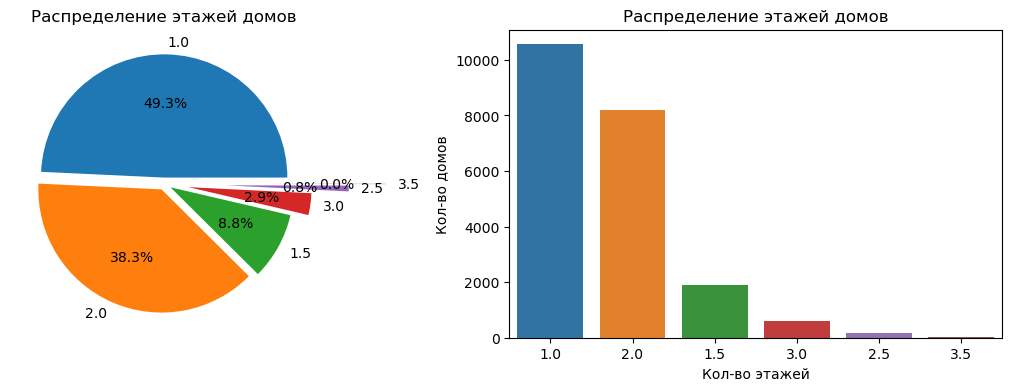

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

explode=[0.05, 0.05, 0.06, 0.2, 0.5, 0.8]
data.plot(kind="pie", autopct='%1.1f%%', explode=explode, ax=ax[0])
ax[0].set_title('Распределение этажей домов')
ax[0].set_ylabel('')

sns.countplot(data=df, x='floors', order=df['floors'].value_counts().index, ax=ax[1])
ax[1].set_title('Распределение этажей домов') 
ax[1].set_xlabel('Кол-во этажей')
ax[1].set_ylabel('Кол-во домов');

*96% проданых домов имеют от 1-го до 2-х этажей, из них 9% - 1.5 этажа.\
3% проданых домов имеют 3 этажа.\
Реже всего продавались дома с количеством этажей 2.5 и 3.5 - всего 1%.*

### 2.3 Изучите распределение состояния домов

In [27]:
df['condition'].describe()

count    21436.000000
mean         3.410384
std          0.650235
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

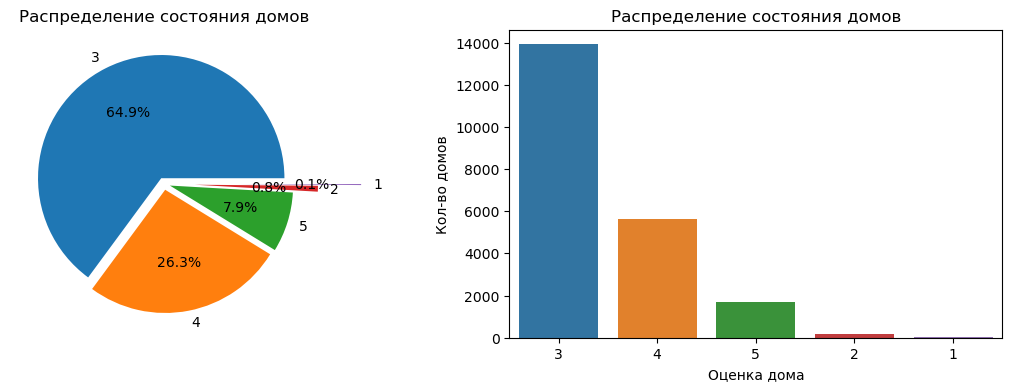

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

explode=[0.05, 0.05, 0.05, 0.25, 0.6]
df['condition'].value_counts().plot(kind="pie", autopct='%1.1f%%', explode=explode, ax=ax[0])
ax[0].set_title('Распределение состояния домов')
ax[0].set_ylabel('')

sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index, ax=ax[1])
ax[1].set_title('Распределение состояния домов') 
ax[1].set_xlabel('Оценка дома')
ax[1].set_ylabel('Кол-во домов');

*Больше всего (65%) продано домов со средней оценкой состояния, 34% проданых домов имеют оценку состояния выше среднего и всего 1% домов - ниже среднего.*

## Задание 3.

**Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. \
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.**

In [29]:
df['price'].describe()

count    21436.000000
mean       541.649963
std        367.314929
min         75.000000
25%        324.866000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

In [31]:
np.quantile(df['price'], 0.95)

1160.0

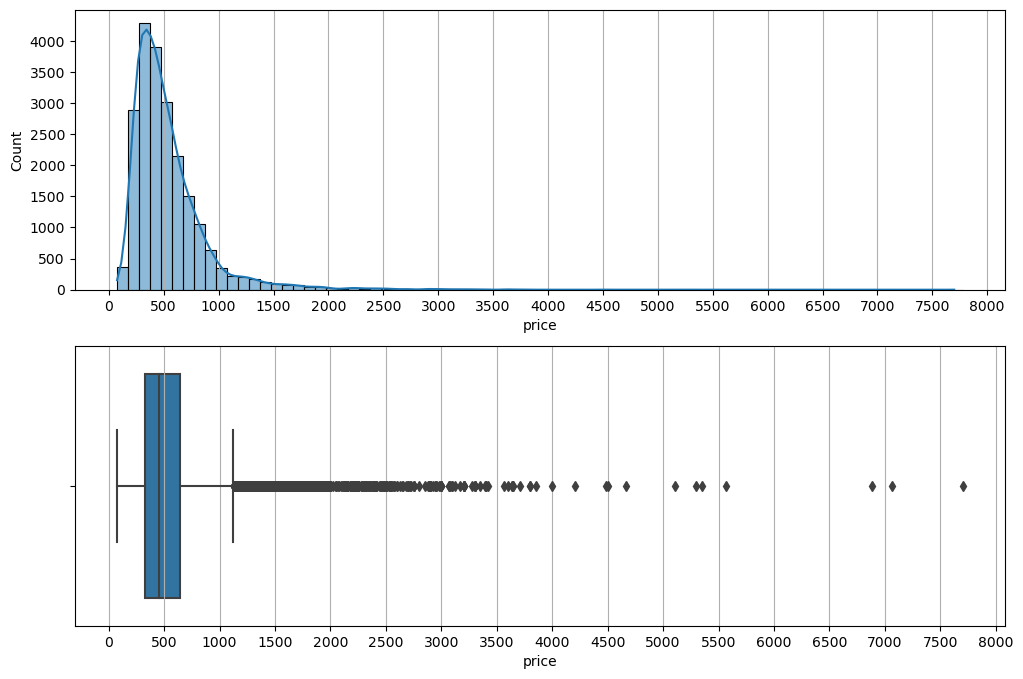

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

sns.histplot(df['price'], binwidth=100, kde=True, ax=ax[0])
sns.boxplot(df['price'], ax=ax[1])

ticks = np.arange(0,8500,500)
for i in range(2):
    ax[i].set_xticks(ticks)
    ax[i].grid(axis='x')

*Стоимость недвижимости варьируется от 75 тыс. до 7.7 млн. долларов(?). При этом 95% домов были проданы в пределе 1.2 млн. долларов. \
Средняя стоимость дома 541 тыс. при медиане 450 тыс., что так же говорит о скошенности (ассиметрии) распределения.\
В основном продаются дома от 325 тыс. до 645 тыс. долларов.*

Разделим признаки на числовые и категориальные, выделим исследуемый признак.

In [32]:
target = 'price'
num_var = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
cat_var = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'waterfront']

Построим корреляционную матрицу для числовых признаков.

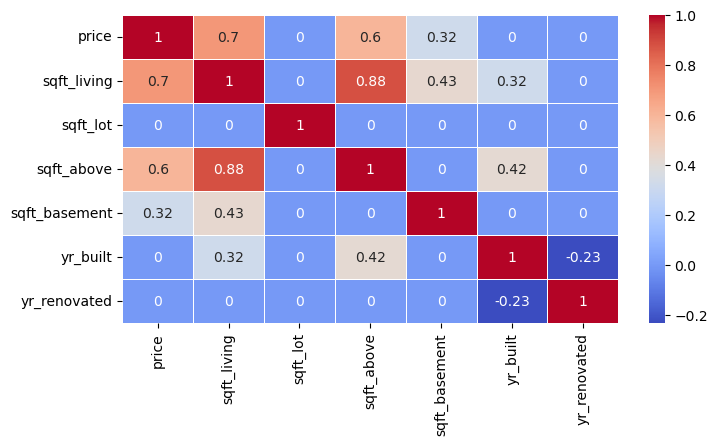

In [33]:
data = df[[target] + num_var]

corr_matrix = np.round(data.corr(),2)
corr_matrix[np.abs(corr_matrix)<=0.2] = 0
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths= 0.5);

In [34]:
corr_matrix[target].sort_values(ascending=False)

price            1.00
sqft_living      0.70
sqft_above       0.60
sqft_basement    0.32
sqft_lot         0.00
yr_built         0.00
yr_renovated     0.00
Name: price, dtype: float64

*Заметная корреляционная связь стоимости дома с жилой площадью (sqft_living) и площадью наземной части (sqft_above), слабая корреляционная связь с площадью подвала (sqft_basement).*

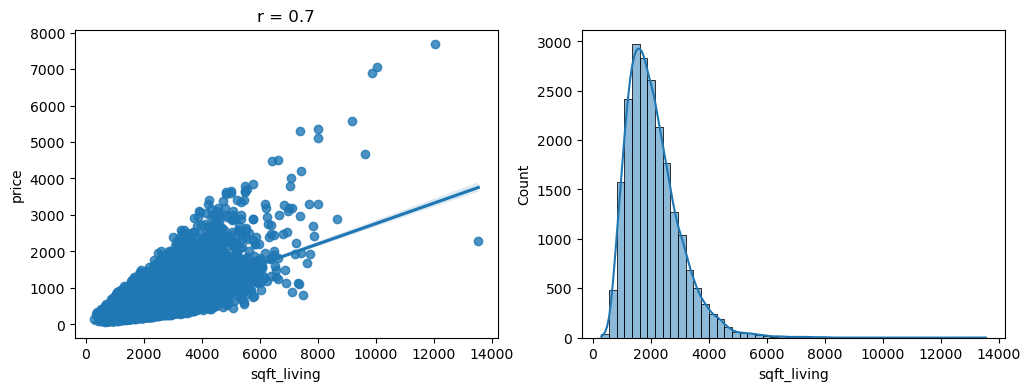

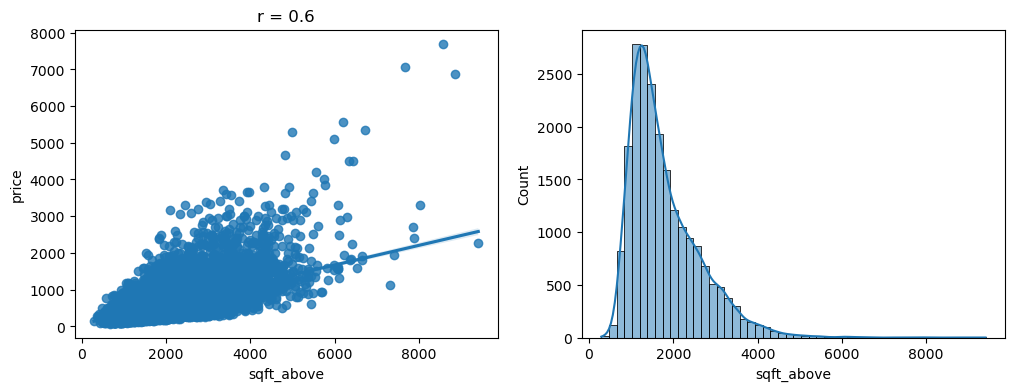

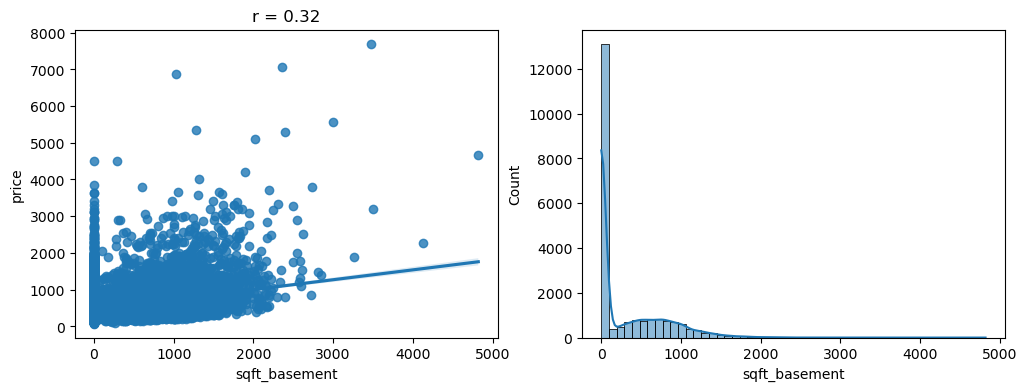

In [35]:
num_var = ['sqft_living', 'sqft_above', 'sqft_basement']

for var in num_var:
    fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))
    
    sns.regplot(data=df, x=var, y=target, ax=ax[0])
    ax[0].set_title(f"r = {corr_matrix[target][var]}")
    
    sns.histplot(data=df, x=var, bins=50, kde=True, ax=ax[1])

*Все три показателя связаны с площадью застройки, причем площади наземной и подземной частей составлюят общую жилую площадь.\
В данном случае можно говорить о заметной прямой линейной связи между стоимостью дома и жилой площадью.*

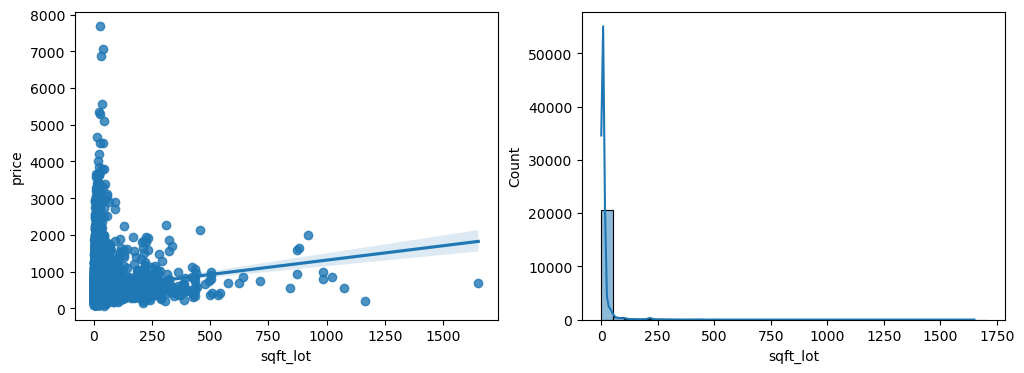

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))

sns.regplot(data=df, x=df['sqft_lot']/1000, y=target, ax=ax[0])
sns.histplot(data=df, x=df['sqft_lot']/1000, binwidth=50, kde=True, ax=ax[1]);

*Большинство домов имеют маленький участок либо не имеют прилегающего участка, при этом у таких домов самый большой разброс цен. Площадь прилегающего участка не влияет на стоимость дома.*

In [37]:
df['renovated'] = df['yr_renovated'].apply(lambda y: 1 if y>0 else 0)
df['renovated'].value_counts(normalize=True)

0    0.957548
1    0.042452
Name: renovated, dtype: float64

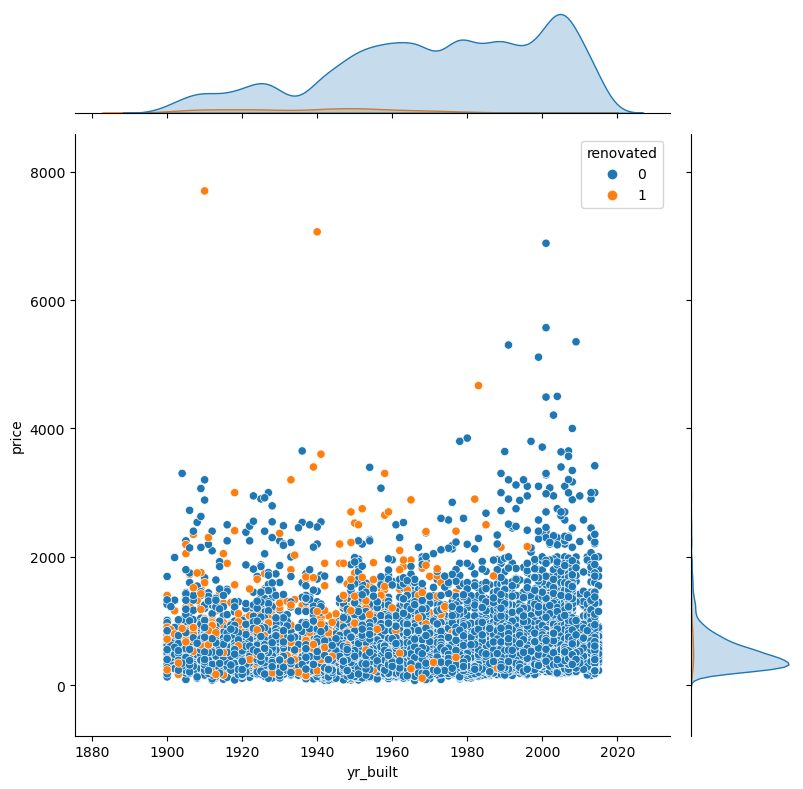

In [38]:
var = 'yr_built'
sns.jointplot(data=df, x=var, y=target, hue='renovated', height=8);

*Цены на дома равномерно распределены по годам строительства, что указывает на отсутствие зависимости. Наличие реконструкции (ремонта) в целом не влиет на стоимость домов.*

Посмотрим распределение категориальных признаков.

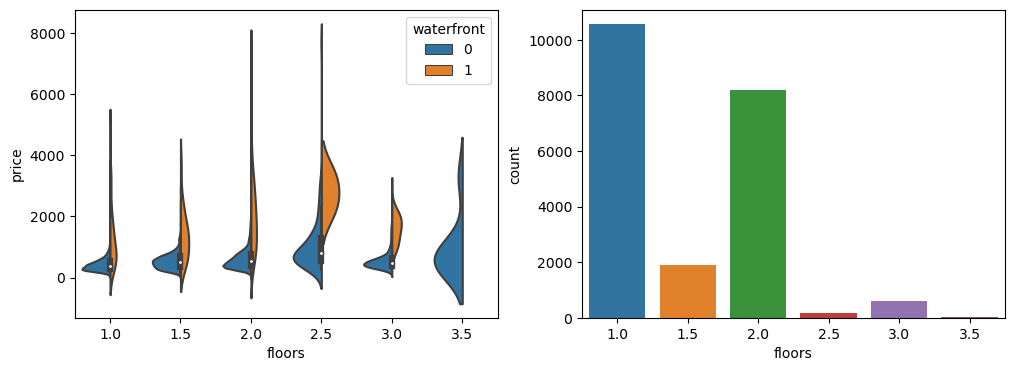

In [39]:
var = 'floors'
fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))
#sns.boxplot(data=df, y=target, x=var, hue='waterfront', ax=ax[0])
sns.violinplot(data=df, y=target, x=var, hue='waterfront', split=True, ax=ax[0])
sns.countplot(data=df, x=var, ax=ax[1]);

*Большинство проданых домов имеют 1 или 2 этажа. Дома с 2.5 этажами в среднем стоят дороже.\
Дома с видом на набережную (waterfront) продаются дороже, чем дома с аналогичным количеством этажей.*

Сгруппируем показатель оценки качества строительства и дизайна (grade):\
1-3 - низкий, 4-6 - ниже среднего, 7 - средний, 8-10 выше среднего, 11-13 - высокий.

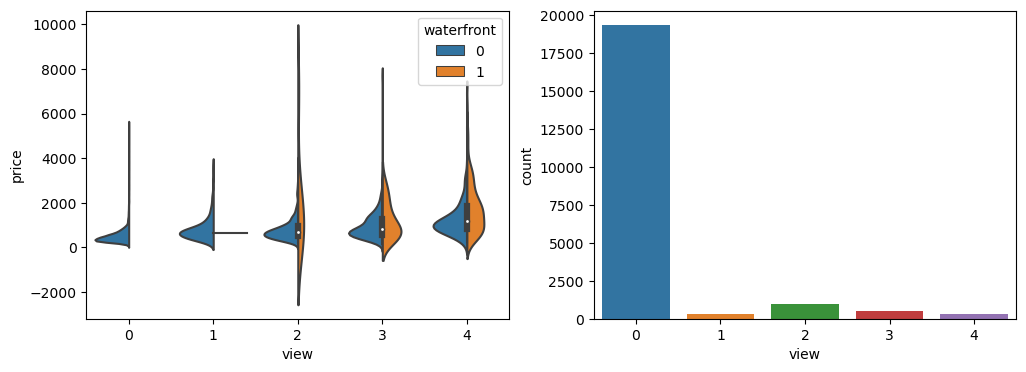

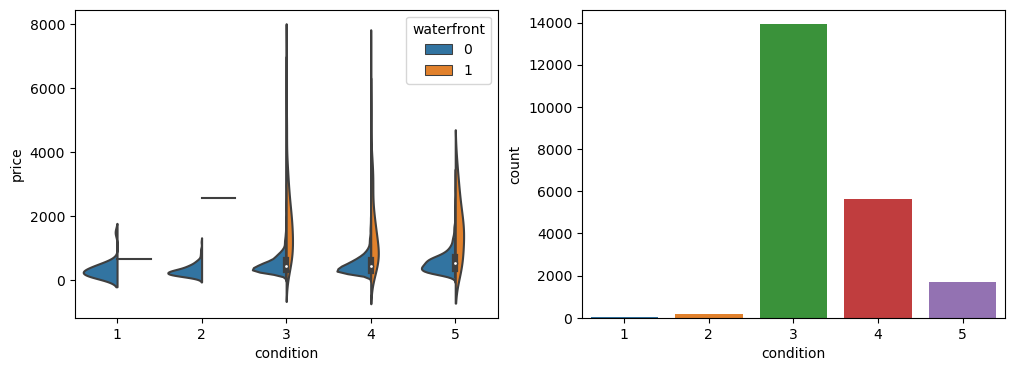

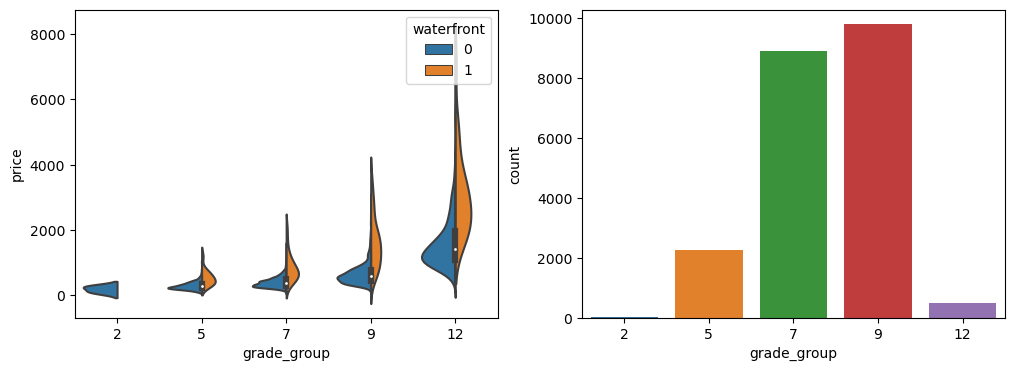

In [40]:
df['grade_group'] = pd.cut(df['grade'], bins=[0,4,7,8,11,14], right=False, labels=[2,5,7,9,12]).astype(int)
cat_var = ['view', 'condition', 'grade_group']

for var in cat_var:
    fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))
    #sns.boxplot(data=df, y=target, x=var, hue='waterfront', ax=ax[0])
    sns.violinplot(data=df, y=target, x=var, hue='waterfront', split=True, ax=ax[0])
    sns.countplot(data=df, x=var, ax=ax[1])

*Больше всего продано домов с оценкой внешнего вида (view) 0 и они же в среднем дешевле других домов. Стоимость домов с оценкой 4 в среднем выше, чем у домов с более низкими оценками. Вид на набережную практически не влияет на цену дома при группировке по внешнему виду.*

*Оценка состояния (condition) почти не влияет на цену, при этом чаще продаются дома со средней оценкой и выше среднего. Дома с видом на набережную в среднем стоя дороже домов с аналогичной оценкой сотояния.*

*В основном покупают дома со средней и выше среднего оценками качества строительства и дизайна (grade). Наблюдается значительный рост стоимости дома с ростом оценки качества (возможно экпоненциальная зависимость?). Вид на набережную также имеет значительное влияние на стоимость дома при одинаковой оценке качества.*

Исключим из анализа дом с 33-мя спальнями. \
Сгруппируем кол-во ванных комнат (0.25 - комната с туалетом, 0.5 - комната с туалетом и раковиной) по числу ванных.

In [41]:
#df = df[df['bedrooms']<33]
df['bathrooms_group'] = df['bathrooms'].astype(int)

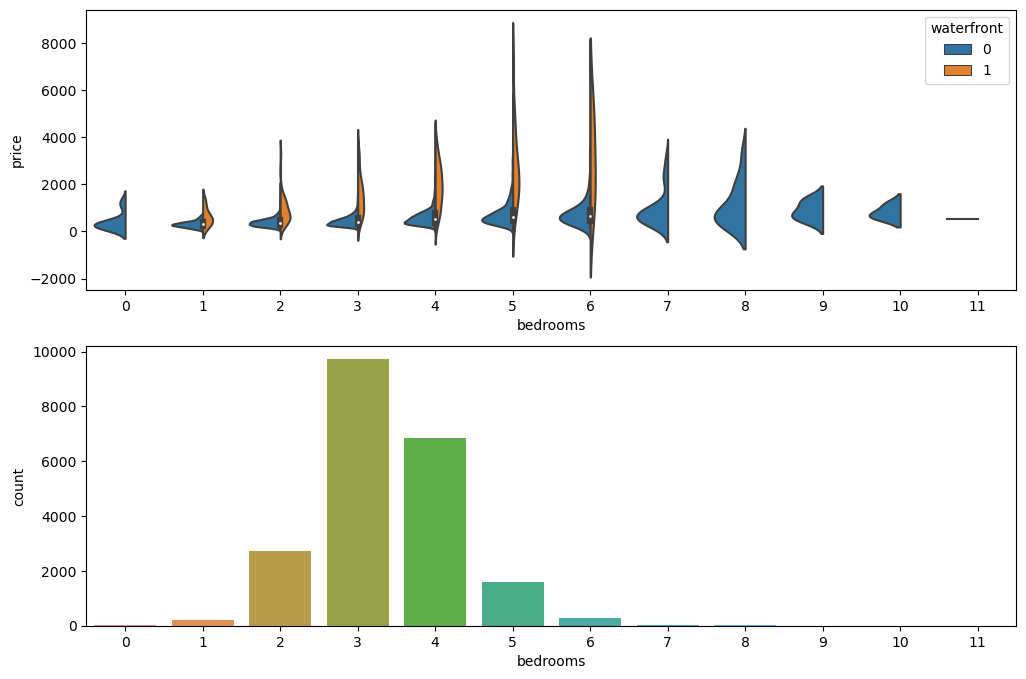

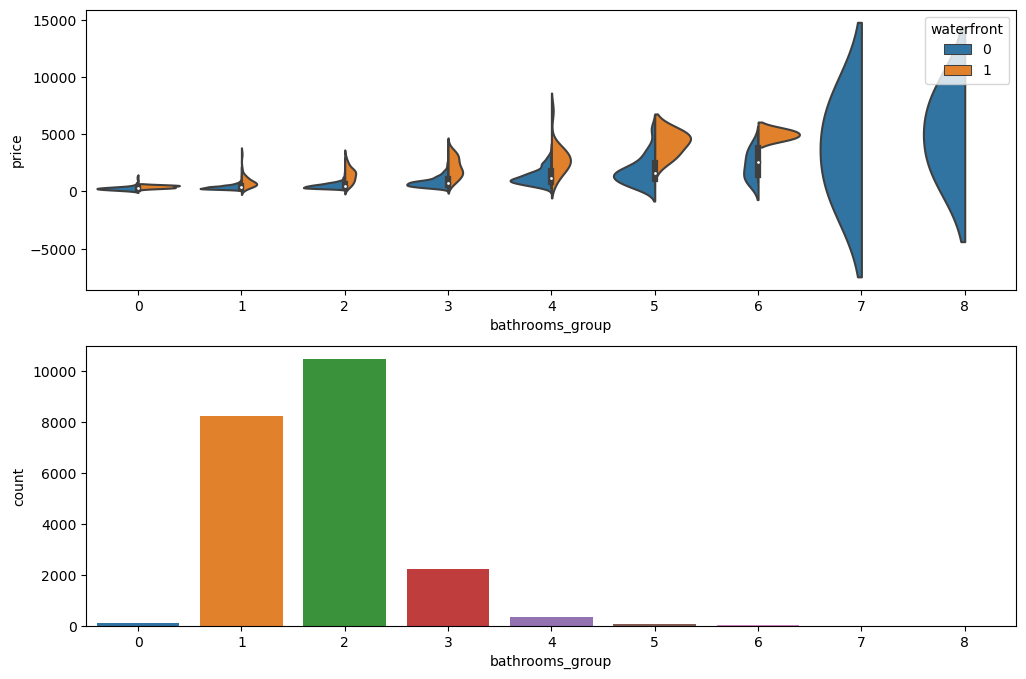

In [42]:
cat_var = ['bedrooms', 'bathrooms_group']
data = df[df['bedrooms']<33][[target] + cat_var + ['waterfront']]

for var in cat_var:
    fig, ax = plt.subplots(2, 1, figsize=(6*2, 4*2))
    #sns.boxplot(data=data, y=target, x=var, hue='waterfront', ax=ax[0])
    sns.violinplot(data=data, y=target, x=var, hue='waterfront', split=True, ax=ax[0])
    sns.countplot(data=data, x=var, ax=ax[1])

*Больше всего продано домов с 3 и 4 спальнями. В целом количество спален не влияет на стоимость дома.*

*По количеству ванных комнат больше всего продано домов с 1-ой или 2-мя ванными, значительно меньше с 3-мя. При этом при увеличении количества ванных комнат средняя стоимость дома явно растет.*

*Вид на набережную имеет значительное влияние на стоимость домов при группировке по количеству спален и ванных комнат.*

Построим корреляционную матрицу для категориальных признаков.

In [43]:
cat_var = ['floors', 'view', 'condition', 'grade', 'bedrooms', 'bathrooms_group', 'waterfront']
data = df[df['bedrooms']<33][[target] + cat_var]

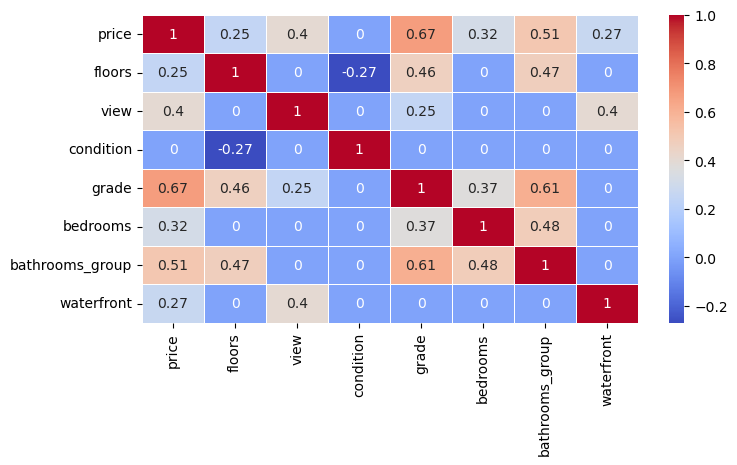

In [44]:
corr_matrix = np.round(data.corr(),2)
corr_matrix[np.abs(corr_matrix)<=0.2] = 0
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths= 0.5);

In [45]:
corr_matrix['price'].sort_values(ascending=False)

price              1.00
grade              0.67
bathrooms_group    0.51
view               0.40
bedrooms           0.32
waterfront         0.27
floors             0.25
condition          0.00
Name: price, dtype: float64

*Заметная корреляционная связь стоимости дома с оценкой качества строительства и дизайна (grade) и количеством ванных комнат (bathrooms). Умеренная корреляционная связь с оценкой внешнего вида (view) и количеством спален (bedrooms). Слабая корреляционная связь с видом на набережную (waterfront) и количеством этажей (floors).*

Посмотрим распределние стоимости недвижимости в зависимости от местонахождения.\
Разделим стоимость домов на группы: до 350 тыс.дол. (low), от 350 до 650 тыс.дол. (middle), больше 650 тыс.дол. (high).

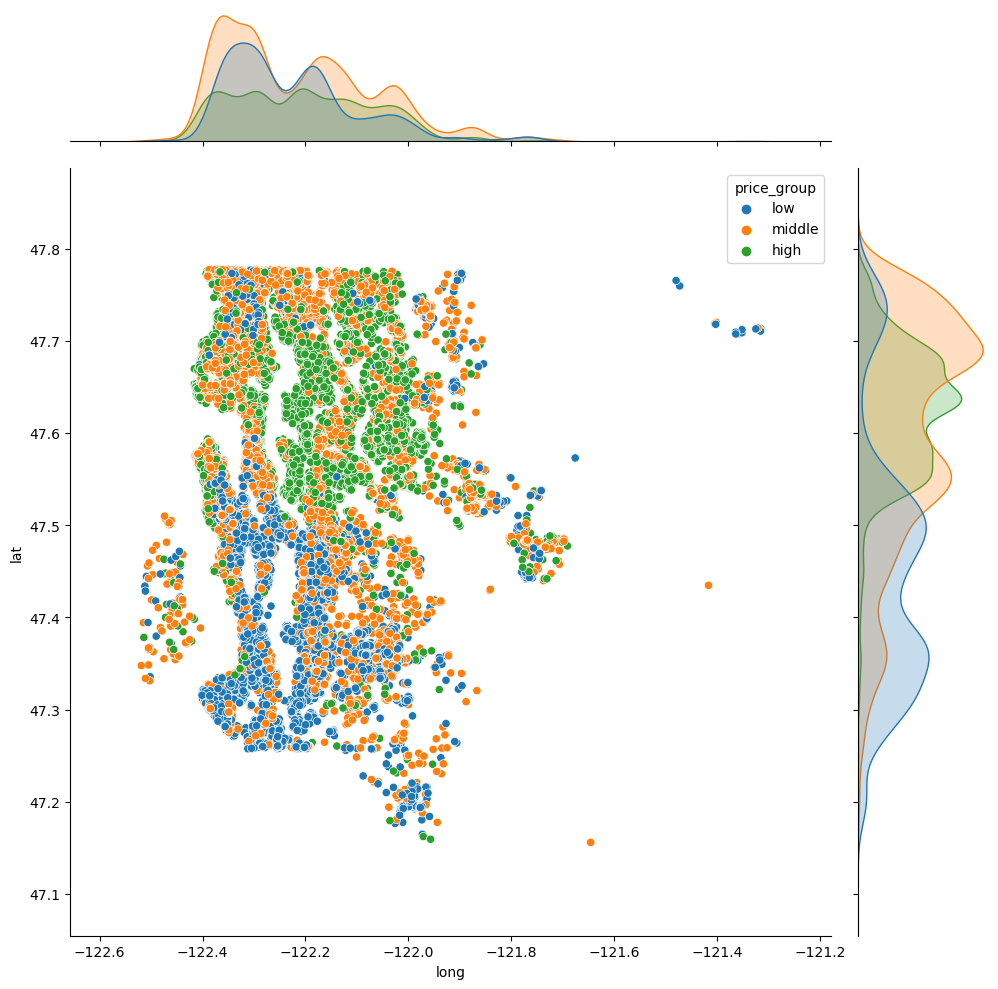

In [46]:
df['price_group'] = pd.cut(df['price'],
                           bins=[0,350,650,np.inf],
                           right=False,
                           labels=['low','middle','high'])
sns.jointplot(data=df, x='long', y='lat', hue='price_group', height=10);

*Дома стоимостью до 350 тыс.дол. присутствуют во всех районах округа с преобладанием в южной части. \
Дома стоимостью от 350 до 650 тыс.дол. присутствуют во всех районах округа с преобладанием в северной части. \
Практически все дома стоимостью больше 650 тыс.дол. находятся в северной части округа.*

Выделим новый признак - цена за 1 кв.м. жилой площади.

In [47]:
df['sqft_price'] = round(df['price'] * 1000 / df['sqft_living'],0)
df['sqft_price'].describe()

count    21436.000000
mean       264.721870
std        109.966441
min         88.000000
25%        183.000000
50%        245.000000
75%        319.000000
max        810.000000
Name: sqft_price, dtype: float64

Разделим цены за 1 кв.м. на три группы: до 200, от 200 до 320, от 320. \
Построим график распределения домов по широте и доготе.

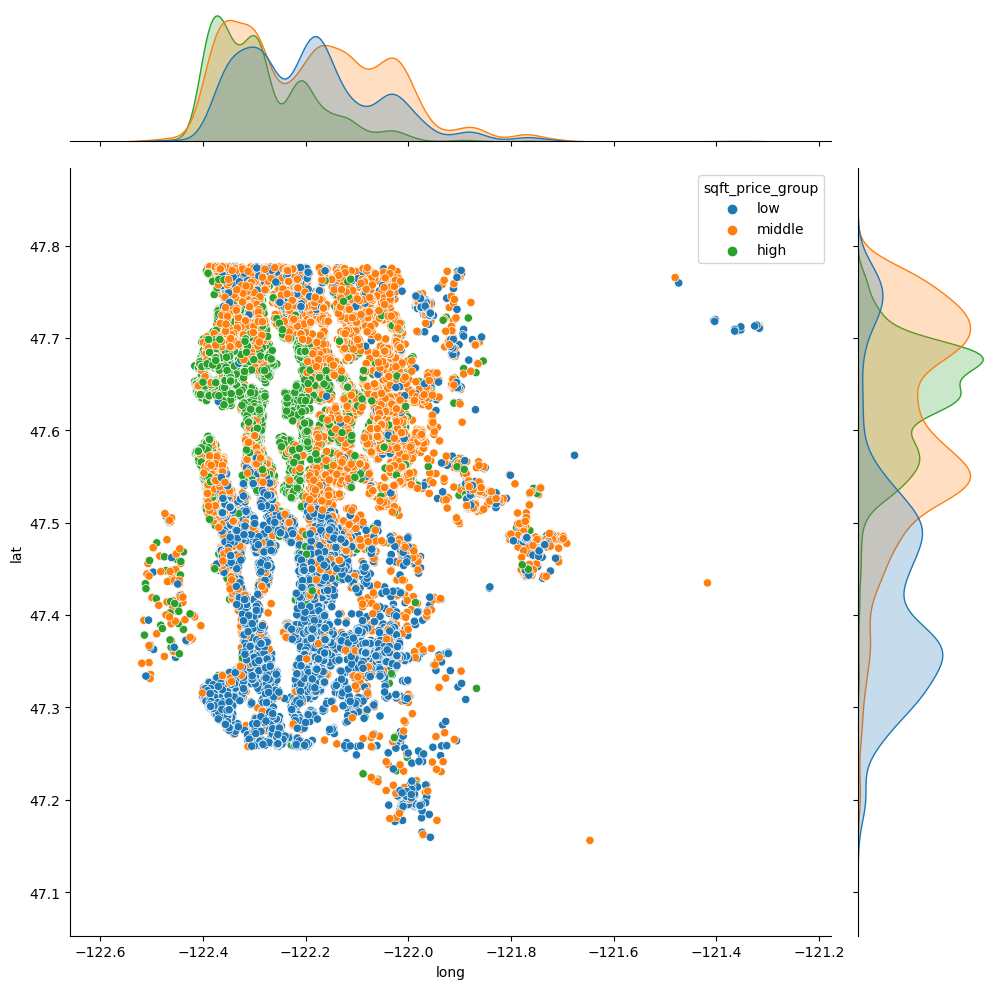

In [48]:
df['sqft_price_group'] = pd.cut(df['sqft_price'],
                                bins=[0,200,320,np.inf],
                                right=False,
                                labels=['low','middle','high'])#.astype(int)

sns.jointplot(data=df, x='long', y='lat', hue='sqft_price_group', height=10);

*Распределение стоимости 1 кв.м. в зависимости от местонахождения дома практически повторяет распределение стоимости недвижимости. Можно предположить, что дома с высокой ценой сосредоточены в районе экономического и/или административного центра округа.* \
*Местонахождение дома (удаленность от центра) имеет большое влияние на стоимость недвижимости.*

Сформируем интерактивную карту.

In [49]:
data = df[['price', 'sqft_living', 'floors', 'bedrooms', 'bathrooms', 
           'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
           'lat', 'long']]
data.rename(columns={'lat': 'Latitude', 'long': 'Longitude'}, inplace = True)
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

In [50]:
config = {
    "version": "v1",
    'config': {
        'mapState': {
            'latitude': 47.5,
            'longitude': -122.0,
            'zoom': 9.6
        }
    }
}

kmap = KeplerGl(config=config, height=700)
kmap.add_data(data, 'kc_house_data')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [51]:
kmap.save_to_html(config=config, file_name='./king.html')

Map saved to ./king.html!
